In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
nameing_list = pd.read_csv("Name_list.csv", index_col = 0)

data = pd.read_csv("CSV_2021-11-25-11-39-20.csv", delimiter = ";", index_col = "Timestamp", parse_dates = True)
data.replace({",":"."}, regex = True, inplace = True)
data = data.resample('h').max()

for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        pass
    if data[col].mean()>0:
        data[col].replace({0:np.nan})
        data[col].interpolate(inplace = True)
        
data = data[1:-1]

grouped_frame = pd.DataFrame(index = data.index)

In [3]:
TEMS_list = nameing_list["TEM"].unique()
TYPE_list = nameing_list["Type"].unique()

In [4]:
for tem in TEMS_list:
    for t in TYPE_list:
        names = nameing_list["Full Name"][(nameing_list["Type"]==t) & (nameing_list["TEM"]==tem)].values
#         print ("{0} {1}".format(tem, t))
        if any(["kWh" in name] for name in names):
            
            grouped_frame["{0} {1}".format(tem, t)] = data[names].sum(axis=1).diff()
#         print (data[names])

In [5]:
grouped_frame.filter(like="HVAC"), grouped_frame.filter(like="HVAC").sum(axis=1)

(                     TEM1 HVAC  TEM2 HVAC
 Timestamp                                
 2021-10-01 01:00:00        NaN        NaN
 2021-10-01 02:00:00    431.528    169.564
 2021-10-01 03:00:00    430.290    176.699
 2021-10-01 04:00:00    439.973    167.011
 2021-10-01 05:00:00    431.040    172.409
 ...                        ...        ...
 2021-10-31 19:00:00    445.518    212.976
 2021-10-31 20:00:00    434.519    202.289
 2021-10-31 21:00:00    421.126    203.899
 2021-10-31 22:00:00    414.958    183.292
 2021-10-31 23:00:00    418.027    192.139
 
 [743 rows x 2 columns],
 Timestamp
 2021-10-01 01:00:00      0.000
 2021-10-01 02:00:00    601.092
 2021-10-01 03:00:00    606.989
 2021-10-01 04:00:00    606.984
 2021-10-01 05:00:00    603.449
                         ...   
 2021-10-31 19:00:00    658.494
 2021-10-31 20:00:00    636.808
 2021-10-31 21:00:00    625.025
 2021-10-31 22:00:00    598.250
 2021-10-31 23:00:00    610.166
 Freq: H, Length: 743, dtype: float64)

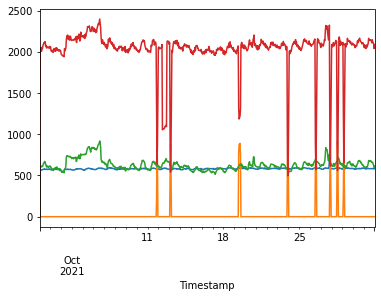

In [6]:
for t in TYPE_list:
    grouped_frame["{0} {1}".format("Total", t)] = grouped_frame.filter(like=t).sum(axis=1)
    grouped_frame["{0} {1}".format("Total", t)].plot()

<AxesSubplot:xlabel='Timestamp'>

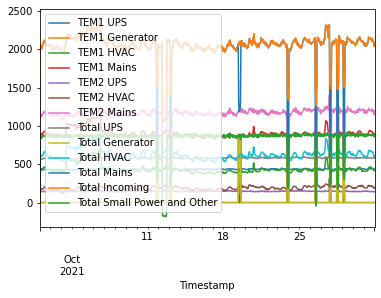

In [18]:
grouped_frame.plot()

In [8]:
incomers_list = list(nameing_list["Type"].unique())

In [9]:
nameing_list["Type"][nameing_list["Energy Flow"] == "Incoming"].unique()

array(['Generator', 'Mains'], dtype=object)

In [10]:
outgoing_list = list(nameing_list["Type"][nameing_list["Energy Flow"] == "Outgoing"].unique())
outgoing_list

['UPS', 'HVAC']

In [11]:
grouped_frame["{0} {1}".format("Total", "Incoming")] = grouped_frame[["Total Mains", "Total Generator"]].sum(axis=1)
grouped_frame["{0} {1}".format("Total", "Small Power and Other")] = grouped_frame["Total Incoming"] - grouped_frame["Total UPS"] - grouped_frame["Total HVAC"]

<BarContainer object of 3 artists>

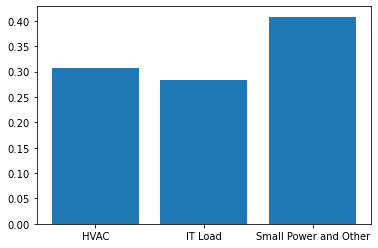

In [20]:
plt.plot(figsize=(10, 10))
plt.xticks([1,2,3], ["HVAC", "IT Load", "Small Power and Other"])
bar_data = [grouped_frame["Total HVAC"].sum()/grouped_frame["Total Incoming"].sum(), grouped_frame["Total UPS"].sum()/grouped_frame["Total Incoming"].sum(), grouped_frame["Total Small Power and Other"].sum()/grouped_frame["Total Incoming"].sum()]
plt.bar([1, 2, 3], bar_data)

In [21]:
bar_data

[0.30788368849258246, 0.28397306089351415, 0.40814325061390344]

<AxesSubplot:xlabel='Timestamp'>

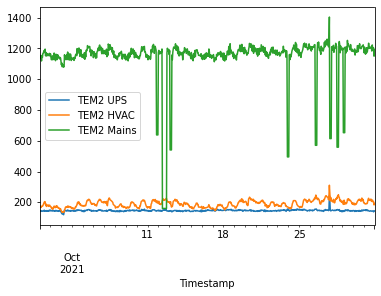

In [27]:
grouped_frame.filter(like="TEM2").plot()

In [36]:
nameing_list[nameing_list["TEM"] == "TEM2"]

,Name,Full Name,TEM,Type,Energy Flow
10,C_TEM_2_DB_UPS_A3,CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into th...,TEM2,UPS,Outgoing
11,C_TEM_2_DB_UPS_B3,CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into th...,TEM2,UPS,Outgoing
12,C_TEM_2_HVAC_A_Supply,CT1_TEM2.C_TEM_2_HVAC_A_Supply#Real Energy Int...,TEM2,HVAC,Outgoing
13,C_TEM_2_HVAC_B_Supply,CT1_TEM2.C_TEM_2_HVAC_B_Supply#Real Energy Int...,TEM2,HVAC,Outgoing
14,C_TEM_2_MLV_A,CT1_TEM2.C_TEM_2_MLV_A#Real Energy Into the Lo...,TEM2,Mains,Incoming
15,C_TEM_2_MLV_A_UPS,CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into th...,TEM2,UPS,Outgoing
16,C_TEM_2_MLV_B,CT1_TEM2.C_TEM_2_MLV_B#Real Energy Into the Lo...,TEM2,Mains,Incoming


In [38]:
TEMS_list = list(nameing_list["TEM"].unique())
TYPE_list = list(nameing_list["Type"].unique())
incomers_list = list(nameing_list["Type"][nameing_list["Energy Flow"] == "Incoming"].unique())
outgoing_list = list(nameing_list["Type"][nameing_list["Energy Flow"] == "Outgoing"].unique())

([<matplotlib.patches.Wedge at 0x1562a0e9d60>,
 [Text(1.0992678616073095, 0.04012690415785175, 'Generator 1.2%'),
  Text(-1.0992678614899047, -0.04012690737412936, 'Mains 98.8%')])

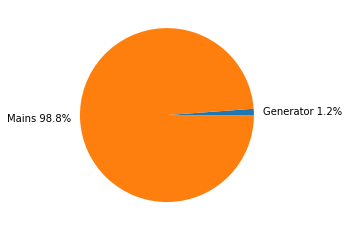

In [41]:
plt.plot(figsize=(10, 10))
pie_plot = []
labels = []
total_incoming = grouped_frame["{0} {1}".format("Total", "Incoming")].sum()
for incomer in incomers_list:
    incomer_sum = grouped_frame["Total {0}".format(incomer)].sum()
    pie_plot.append(incomer_sum)
    labels.append("{0} {1}%".format(incomer, round(incomer_sum/total_incoming,3)*100))
plt.pie(pie_plot, labels=labels)
# save_figure("Supply Power Sources", "Energy Supply Breakdown")
# plt.close()

In [44]:
data.filter(regex="^((?!HVAC).)*$").columns

Index(['CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_MLV_A#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_MLV_B#Real Energy Into the Load#kWh'],
      dtype='object')

In [45]:
data.columns

Index(['CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_HVAC_A_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_HVAC_B_Supply#Real Energy Into the

In [49]:
data[["CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh",]]

,CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh
Timestamp,
2021-10-01 01:00:00,491797.1250
2021-10-01 02:00:00,491947.1250
2021-10-01 03:00:00,492096.6875
2021-10-01 04:00:00,492246.2188
2021-10-01 05:00:00,492396.0000
...,...
2021-10-31 19:00:00,605582.8125
2021-10-31 20:00:00,605739.2500
2021-10-31 21:00:00,605895.8750


In [56]:
grouped_frame

,TEM1 UPS,TEM1 Generator,TEM1 HVAC,TEM1 Mains,TEM2 UPS,TEM2 HVAC,TEM2 Mains,Total UPS,Total Generator,Total HVAC,Total Mains,Total Incoming,Total Small Power and Other
Timestamp,,,,,,,,,,,,,
2021-10-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0,0.000,0.00,0.00,0.0000
2021-10-01 02:00:00,423.6719,0.0,431.528,889.00,144.008,169.564,1136.60,567.6799,0.0,601.092,2025.60,2025.60,856.8281
2021-10-01 03:00:00,422.5937,0.0,430.290,886.00,144.243,176.699,1155.22,566.8367,0.0,606.989,2041.22,2041.22,867.3943
2021-10-01 04:00:00,422.4219,0.0,439.973,896.75,141.160,167.011,1154.57,563.5819,0.0,606.984,2051.32,2051.32,880.7541
2021-10-01 05:00:00,423.0469,0.0,431.040,887.25,144.121,172.409,1119.03,567.1679,0.0,603.449,2006.28,2006.28,835.6631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 19:00:00,440.3750,0.0,445.518,920.50,143.743,212.976,1202.10,584.1180,0.0,658.494,2122.60,2122.60,879.9880
2021-10-31 20:00:00,441.0312,0.0,434.519,909.50,141.731,202.289,1193.60,582.7622,0.0,636.808,2103.10,2103.10,883.5298
2021-10-31 21:00:00,441.4688,0.0,421.126,897.75,137.971,203.899,1203.64,579.4398,0.0,625.025,2101.39,2101.39,896.9252


In [58]:
nameing_list

,Name,Full Name,TEM,Type,Energy Flow
0,C1_TEM1_CCL_UPS_System_A,CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy ...,TEM1,UPS,Outgoing
1,C1_TEM1_CCL_UPS_System_B,CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy ...,TEM1,UPS,Outgoing
2,C1_TEM1_CCL_UPS_System_C,CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy ...,TEM1,UPS,Outgoing
3,C1_TEM1_Generator_A_Supply,CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energ...,TEM1,Generator,Incoming
4,C1_TEM1_Generator_B_Supply,CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energ...,TEM1,Generator,Incoming
5,C1_TEM1_Generator_C_Supply,CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energ...,TEM1,Generator,Incoming
6,C1_TEM1_HVAC_System_A,CT1_TEM1.C1_TEM1_HVAC_System_A#Real Energy Int...,TEM1,HVAC,Outgoing
7,C1_TEM1_HVAC_System_B,CT1_TEM1.C1_TEM1_HVAC_System_B#Real Energy Int...,TEM1,HVAC,Outgoing
8,C1_TEM1_HVAC_System_C,CT1_TEM1.C1_TEM1_HVAC_System_C#Real Energy Int...,TEM1,HVAC,Outgoing
9,C1_TEM1_Main_Incomer_HT,CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy I...,TEM1,Mains,Incoming


In [80]:
nameing_list[(nameing_list["Type"] != "HVAC") & (nameing_list["Energy Flow"] == "Outgoing")]["Full Name"]

0     CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy ...
1     CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy ...
2     CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy ...
10    CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into th...
11    CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into th...
15    CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into th...
Name: Full Name, dtype: object

In [89]:
datadir = r"C:\Users\jarry\Documents\Python Scripts\Teraco Coding Production\Production Environment\Data"

In [90]:
import pandas as pd

In [112]:

directory = os.listdir(datadir)
if "Master.csv" not in directory:
    
    base_frame = pd.DataFrame()
    
    for file in directory:
        if file[-4:]==".csv":
#             print (file)
            temp_frame = pd.read_csv(os.path.join(datadir,file), delimiter=';')
            
            base_frame = pd.concat([base_frame, temp_frame])
            
        os.remove(os.path.join(datadir,file))
            
elif len(os.listdir(datadir))>1:
    base_frame = pd.read_csv(os.path.join(datadir,"Master.csv"))
    for file in directory:
        if file[-4:]==".csv" and file != "Master.csv":
#             print (file)
            temp_frame = pd.read_csv(os.path.join(datadir,file), delimiter=';')
            
            base_frame = pd.concat([base_frame, temp_frame])
            
        os.remove(os.path.join(datadir,file))
            
base_frame.to_csv(os.path.join(datadir,"Master.csv"))

In [117]:
data

,CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_HVAC_System_A#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_HVAC_System_B#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_HVAC_System_C#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_HVAC_A_Supply#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_HVAC_B_Supply#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_MLV_A#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_MLV_B#Real Energy Into the Load#kWh
Timestamp,,,,,,,,,,,,,,,,,
2021-10-01 01:00:00,491797.1250,194654.6719,579624.9375,6333.224609,6624.004395,8407.737305,331518.373,399440.430,172860.989,2275968.75,3681772.172,2643773.439,3614022.261,2146893.191,21132053.88,NaN,15194744.81
2021-10-01 02:00:00,491947.1250,194766.4688,579786.8125,6333.224609,6624.004395,8407.737305,331624.326,399650.867,172976.127,2276857.75,3681865.371,2643824.248,3614131.430,2146953.586,21132728.83,NaN,15195206.46
2021-10-01 03:00:00,492096.6875,194878.0625,579948.2500,6333.224609,6624.004395,8407.737305,331728.999,399858.052,173094.559,2277743.75,3681957.431,2643876.431,3614249.252,2147012.463,21133425.82,NaN,15195664.69
2021-10-01 04:00:00,492246.2188,194989.7031,580109.5000,6333.224609,6624.004395,8407.737305,331832.232,400065.199,173224.152,2278640.50,3682046.954,2643928.068,3614356.418,2147072.308,21134116.18,NaN,15196128.90
2021-10-01 05:00:00,492396.0000,195101.3438,580271.1250,6333.224609,6624.004395,8407.737305,331939.136,400275.556,173337.931,2279527.75,3682139.693,2643979.450,3614469.810,2147131.325,21134789.21,NaN,15196574.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 19:00:00,605582.8125,278254.0938,703338.6250,12173.631840,12267.636720,14574.041020,435348.920,526801.064,266289.172,2928538.75,3759083.231,2674591.394,3707609.498,2194113.455,21647594.69,NaN,15520377.38
2021-10-31 20:00:00,605739.2500,278368.3750,703508.9375,12173.631840,12267.636720,14574.041020,435470.597,526973.014,266430.064,2929448.25,3759176.111,2674640.245,3707758.328,2194166.914,21648328.98,NaN,15520836.69
2021-10-31 21:00:00,605895.8750,278482.6563,703679.5000,12173.631840,12267.636720,14574.041020,435596.462,527145.062,266553.277,2930346.00,3759266.716,2674687.611,3707908.236,2194220.905,21649064.97,NaN,15521304.34


In [118]:
data.reset_index().drop_duplicates(subset='Timestamp', keep='last')

,Timestamp,CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_HVAC_System_A#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_HVAC_System_B#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_HVAC_System_C#Real Energy Into the Load#kWh,CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_HVAC_A_Supply#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_HVAC_B_Supply#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_MLV_A#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into the Load#kWh,CT1_TEM2.C_TEM_2_MLV_B#Real Energy Into the Load#kWh
0,2021-10-01 01:00:00,491797.1250,194654.6719,579624.9375,6333.224609,6624.004395,8407.737305,331518.373,399440.430,172860.989,2275968.75,3681772.172,2643773.439,3614022.261,2146893.191,21132053.88,NaN,15194744.81
1,2021-10-01 02:00:00,491947.1250,194766.4688,579786.8125,6333.224609,6624.004395,8407.737305,331624.326,399650.867,172976.127,2276857.75,3681865.371,2643824.248,3614131.430,2146953.586,21132728.83,NaN,15195206.46
2,2021-10-01 03:00:00,492096.6875,194878.0625,579948.2500,6333.224609,6624.004395,8407.737305,331728.999,399858.052,173094.559,2277743.75,3681957.431,2643876.431,3614249.252,2147012.463,21133425.82,NaN,15195664.69
3,2021-10-01 04:00:00,492246.2188,194989.7031,580109.5000,6333.224609,6624.004395,8407.737305,331832.232,400065.199,173224.152,2278640.50,3682046.954,2643928.068,3614356.418,2147072.308,21134116.18,NaN,15196128.90
4,2021-10-01 05:00:00,492396.0000,195101.3438,580271.1250,6333.224609,6624.004395,8407.737305,331939.136,400275.556,173337.931,2279527.75,3682139.693,2643979.450,3614469.810,2147131.325,21134789.21,NaN,15196574.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2021-10-31 19:00:00,605582.8125,278254.0938,703338.6250,12173.631840,12267.636720,14574.041020,435348.920,526801.064,266289.172,2928538.75,3759083.231,2674591.394,3707609.498,2194113.455,21647594.69,NaN,15520377.38
739,2021-10-31 20:00:00,605739.2500,278368.3750,703508.9375,12173.631840,12267.636720,14574.041020,435470.597,526973.014,266430.064,2929448.25,3759176.111,2674640.245,3707758.328,2194166.914,21648328.98,NaN,15520836.69
740,2021-10-31 21:00:00,605895.8750,278482.6563,703679.5000,12173.631840,12267.636720,14574.041020,435596.462,527145.062,266553.277,2930346.00,3759266.716,2674687.611,3707908.236,2194220.905,21649064.97,NaN,15521304.34
741,2021-10-31 22:00:00,606052.5000,278596.9688,703849.8750,12173.631840,12267.636720,14574.041020,435719.746,527325.618,266664.395,2931236.00,3759361.126,2674737.515,3708038.949,2194273.484,21649762.30,NaN,15521757.05
